## 7.2 卷积神经网络基本组成

### 7.2.1 卷积层

【例7-1】

In [2]:
import torch
from torch import nn 
# 需要经过卷积运算的矩阵
input_matrix = torch.ones(1, 1, 7, 7)
# 实例化Conv2d
conv = nn.Conv2d(in_channels=1, out_channels=2, kernel_size=(5,5), stride=1,padding=1)
# 进行卷积操作
output_matrix=conv(input_matrix)
# 输出卷积后的结果
print(output_matrix)
# 查看卷积核的形状
print('卷积核的尺寸为：',conv.weight.shape)
# 查看卷积核的权重参数
print('卷积核为：',conv.weight)
# 查看卷积运算中的偏置参数
print('卷积的偏置为：',conv.bias)

tensor([[[[ 0.0671,  0.1589,  0.1589,  0.1589,  0.0139],
          [ 0.0566,  0.2752,  0.2752,  0.2752,  0.2807],
          [ 0.0566,  0.2752,  0.2752,  0.2752,  0.2807],
          [ 0.0566,  0.2752,  0.2752,  0.2752,  0.2807],
          [-0.1899, -0.1479, -0.1479, -0.1479, -0.0548]],

         [[-1.2440, -1.1146, -1.1146, -1.1146, -1.0140],
          [-1.1812, -1.0689, -1.0689, -1.0689, -1.1521],
          [-1.1812, -1.0689, -1.0689, -1.0689, -1.1521],
          [-1.1812, -1.0689, -1.0689, -1.0689, -1.1521],
          [-0.7257, -0.6517, -0.6517, -0.6517, -0.8198]]]],
       grad_fn=<MkldnnConvolutionBackward0>)
卷积核的尺寸为： torch.Size([2, 1, 5, 5])
卷积核为： Parameter containing:
tensor([[[[ 0.1268, -0.0336,  0.1132,  0.0604, -0.1505],
          [-0.0434, -0.0040, -0.0313,  0.1756,  0.0659],
          [-0.1165, -0.0806,  0.0523,  0.0294,  0.1693],
          [ 0.0751, -0.1421,  0.0838, -0.1333, -0.1779],
          [ 0.1766,  0.1737, -0.0301,  0.0152,  0.0876]]],


        [[[-0.0171, -0.1262, 

### 7.2.2 激活函数层

#### 1 Sigmoid函数

【例7-2】

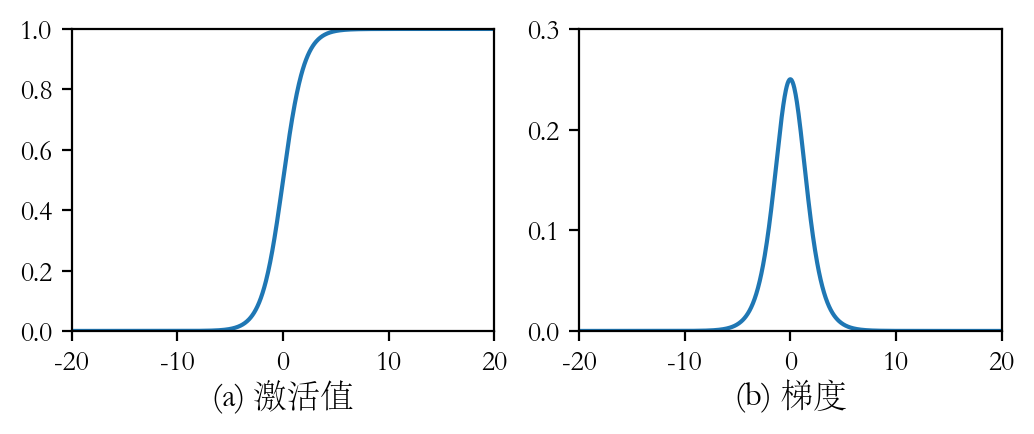

In [166]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import torch
from torch import nn
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['STSong']
plt.rcParams['axes.unicode_minus'] = False
# 定义输入值
x = np.linspace(-20, 20, 1000)
x = torch.from_numpy(x)
# 实例化Sigmoid
sigmoid = nn.Sigmoid()
# 获得激活值
y = sigmoid(x)
# 中心查分法近似求梯度
h = 1e-10
gradient_y = (sigmoid(x + h) - sigmoid(x - h)) / (2 * h)
# 画图
plt.figure(figsize=(6, 2), dpi=100)
plt.subplot(1, 2, 1)
plt.plot(x, y.numpy())
plt.xlim(-20, 20)
plt.ylim(0, 1)
plt.title('(a) 激活值',y=-0.3)
plt.subplot(1, 2, 2)
plt.plot(x, gradient_y.numpy())
plt.xlim(-20, 20)
plt.ylim(0, 0.3)
plt.title('(b) 梯度',y=-0.3)
plt.show()


### 7.2.3 池化层

#### 1 最大池化层和平均池化层
【例7-3】

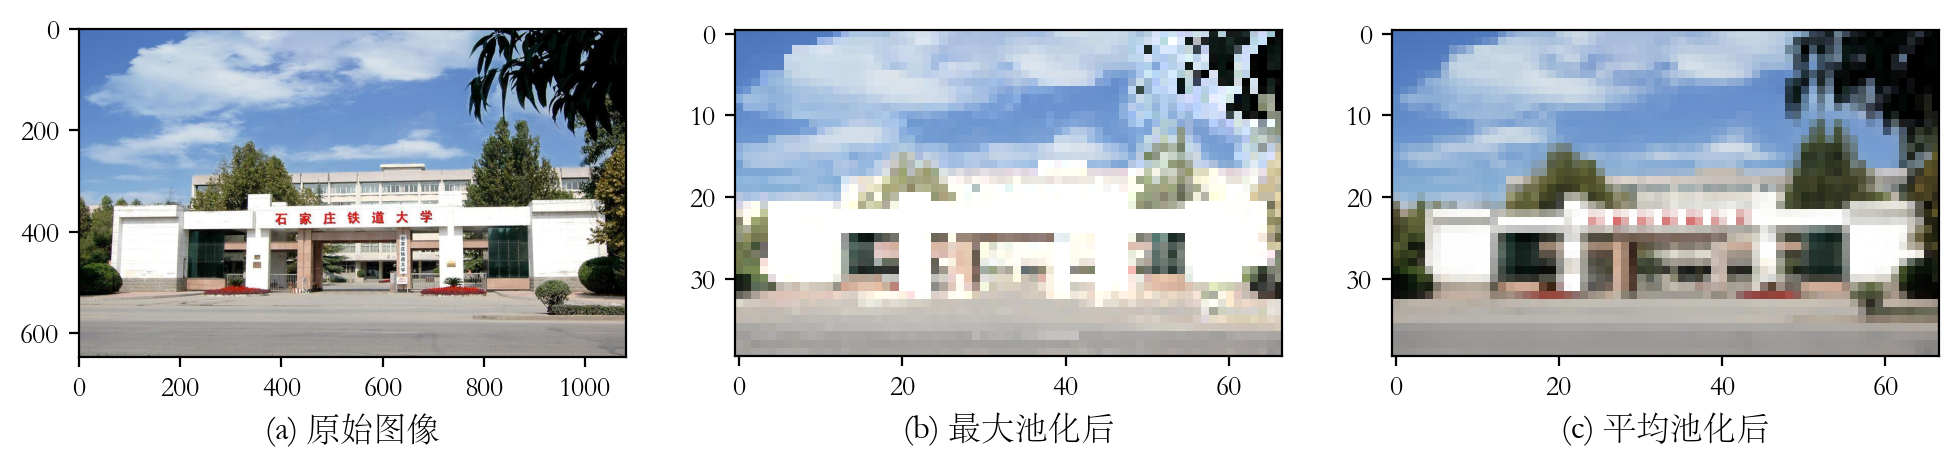

In [252]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

# 读取照片
original_img = plt.imread('door.jfif')
original_img = np.array(original_img)
original_img = original_img.transpose((2, 0, 1))
original_img = torch.from_numpy(original_img).to(dtype=torch.float32)
# 创建最大池化层和平均池化层
max_pooling = nn.MaxPool2d((16, 16), stride=(16, 16))
aver_pooling = nn.AvgPool2d((16, 16), stride=(16, 16))
# 获得最大池化层和平均池化层的输出
output1 = max_pooling(original_img)
# 调整矩阵形状
output1 = output1.numpy().transpose((1, 2, 0))
output2 = aver_pooling(original_img)
output2 = output2.numpy().transpose((1, 2, 0))
original_img = original_img.numpy().transpose((1, 2, 0))
# 绘图
plt.figure(figsize=(12, 4), dpi=100)
plt.subplot(1, 3, 1)
plt.imshow(original_img / 255)
plt.title('(a) 原始图像',y=-0.3)
plt.subplot(1, 3, 2)
plt.imshow(output1 / 255)
plt.title('(b) 最大池化后',y=-0.3)
plt.subplot(1, 3, 3)
plt.imshow(output2 / 255)
plt.title('(c) 平均池化后',y=-0.3)
plt.show()

#### 2 最大池化层和平均池化层
###【例7-4】

In [54]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

# 创建矩阵
input_x = torch.ones(3, 100)
input_x[0] = torch.linspace(1, 100, 100)
input_x[1] = torch.linspace(100, 200, 100)
input_x[2] = torch.linspace(200, 300, 100)
input_x = input.reshape(1, 3, 10, 10)
# 创建全局最大池化层并输出结果
global_maxpool = nn.AdaptiveMaxPool2d((1,1))
output = global_maxpool(input_x)
print('全局最大池化层', output.reshape(1, 3))
# 计算并输出输出全局平均池化后的结果
output = input.mean(dim=(-1,-2))
print('全局平均池化层', output)

全局最大池化层 tensor([[100., 200., 300.]])
全局平均池化层 tensor([[ 50.5000, 150.0000, 250.0000]])


### 7.2.4 Dropout层
###【例7-5】

In [72]:
import torch
import torch.nn as nn

input_x = torch.ones(1,1,5,5)
dropout = nn.Dropout(p=0.9,inplace=False)
output = dropout(input_x)
print('dropout前的数据：\n',input_x)
print('dropout后的数据：\n',output)

dropout前的数据：
 tensor([[[[1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.]]]])
dropout后的数据：
 tensor([[[[ 0.,  0.,  0.,  0.,  0.],
          [ 0., 10.,  0., 10.,  0.],
          [ 0.,  0., 10.,  0.,  0.],
          [ 0.,  0.,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  0.,  0.]]]])


### 7.2.5 Batch Normalization(BN)层

###【例7-6】

In [26]:
import torch
import torch.nn as nn

# 定义BN层
BN = torch.nn.BatchNorm2d(num_features=1)
# 定义输入特征
input_x = torch.randn(64, 1, 200, 200)
# 获取BN层输出
output = BN(input_x)
print('BN中的参数：\n', BN)
print('BN前的数据：\n', input_x)
print('BN后的数据：\n', output)


torch.Size([4, 64, 224, 224])

### 7.2.6 全连接层

###【例7-7】

In [31]:
import torch
from torch import nn

# 定义全连接层
linear = nn.Linear(10, 4) 
# 定义输入特征
input_x = torch.ones(1, 10)  
# 获取全连接层输出
output = linear(input_x)

print('全连接层的权重：\n',linear.weight)
print('全连接层的偏置：\n',linear.bias)
print('全连接层的输入：\n',input_x)
print('全连接层的输出：\n',output)

全连接层的权重：
 Parameter containing:
tensor([[-0.2085,  0.2142, -0.0652, -0.2229, -0.2351,  0.1366,  0.1566,  0.2444,
         -0.0636,  0.1495],
        [-0.0966,  0.1501, -0.1185, -0.2606,  0.2156, -0.2598,  0.0811, -0.0849,
         -0.0937, -0.0947],
        [-0.2811, -0.2297,  0.2672, -0.3005,  0.2321,  0.0564, -0.1411, -0.0169,
         -0.2272, -0.1759],
        [ 0.3052,  0.0947, -0.2247,  0.0055,  0.2036, -0.2381,  0.1018,  0.2285,
          0.1705, -0.0377]], requires_grad=True)
全连接层的偏置：
 Parameter containing:
tensor([ 0.0112, -0.2428, -0.1841,  0.0391], requires_grad=True)
全连接层的输入：
 tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])
全连接层的输出：
 tensor([[ 0.1172, -0.8048, -1.0008,  0.6483]], grad_fn=<AddmmBackward0>)
